In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download behrad3d/nasa-cmaps
! unzip nasa-cmaps.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 73% 9.00M/12.3M [00:00<00:00, 70.5MB/s]
100% 12.3M/12.3M [00:00<00:00, 86.1MB/s]
Archive:  nasa-cmaps.zip
  inflating: CMaps/Damage Propagation Modeling.pdf  
  inflating: CMaps/RUL_FD001.txt     
  inflating: CMaps/RUL_FD002.txt     
  inflating: CMaps/RUL_FD003.txt     
  inflating: CMaps/RUL_FD004.txt     
  inflating: CMaps/readme.txt        
  inflating: CMaps/test_FD001.txt    
  inflating: CMaps/test_FD002.txt    
  inflating: CMaps/test_FD003.txt    
  inflating: CMaps/test_FD004.txt    
  inflating: CMaps/train_FD001.txt   
  inflating: CMaps/train_FD002.txt   
  inflating: CMaps/train_FD003.txt   
  inflating: CMaps/train_FD004.txt   
  inflating: CMaps/x.txt             


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
import math
import xgboost
import time
from tqdm import tqdm
import keras.models
import keras.layers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import math
import shutil
import random

In [ ]:
shutil.copy("/content/nasa-cmaps.zip","/content/drive/MyDrive/")
! cp /content/drive/MyDrive/nasa-cmaps.zip /content/
! unzip nasa-cmaps.zip


Archive:  nasa-cmaps.zip
replace CMaps/Damage Propagation Modeling.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CMaps/Damage Propagation Modeling.pdf  
  inflating: CMaps/RUL_FD001.txt     
  inflating: CMaps/RUL_FD002.txt     
  inflating: CMaps/RUL_FD003.txt     
  inflating: CMaps/RUL_FD004.txt     
  inflating: CMaps/readme.txt        
  inflating: CMaps/test_FD001.txt    
  inflating: CMaps/test_FD002.txt    
  inflating: CMaps/test_FD003.txt    
  inflating: CMaps/test_FD004.txt    
  inflating: CMaps/train_FD001.txt   
  inflating: CMaps/train_FD002.txt   
  inflating: CMaps/train_FD003.txt   
  inflating: CMaps/train_FD004.txt   
  inflating: CMaps/x.txt             


In [ ]:
data_train = pd.read_csv("/content/CMaps/train_FD002.txt",sep=" ",header=None)
data_test = pd.read_csv("/content/CMaps/test_FD002.txt",sep=" ",header=None)
data_RUL = pd.read_csv("/content/CMaps/RUL_FD002.txt",sep=" ",header=None)

train_copy = data_train
test_copy = data_test

In [ ]:
data_train.drop(columns=[26,27],inplace=True)
data_test.drop(columns=[26,27],inplace=True)
data_RUL.drop(columns=[1],inplace=True)

In [ ]:
columns_train = ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
data_train.columns = columns_train
data_train.describe()

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,266.069034,2334.557253,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,137.659507,128.068271,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,129.120000,2027.610000,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,131.520000,2387.900000,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,183.200000,2388.080000,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,371.260000,2388.170000,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,523.370000,2390.480000,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100


In [ ]:
# Define a function to calculate the remaining useful life (RUL)
def add_rul(g):
    # Calculate the RUL as the difference between the maximum cycle value and the cycle value for each row
    g['RUL'] = max(g['cycles']) - g['cycles']
    return g

# Apply the add_rul function to the training data grouped by the unit ID
train = data_train.groupby('unit_ID').apply(add_rul)

In [ ]:
train.head()

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,148
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,147
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,146
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,145
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,144


Text(0.5, 1.0, 'Number of Cycles for Engines')

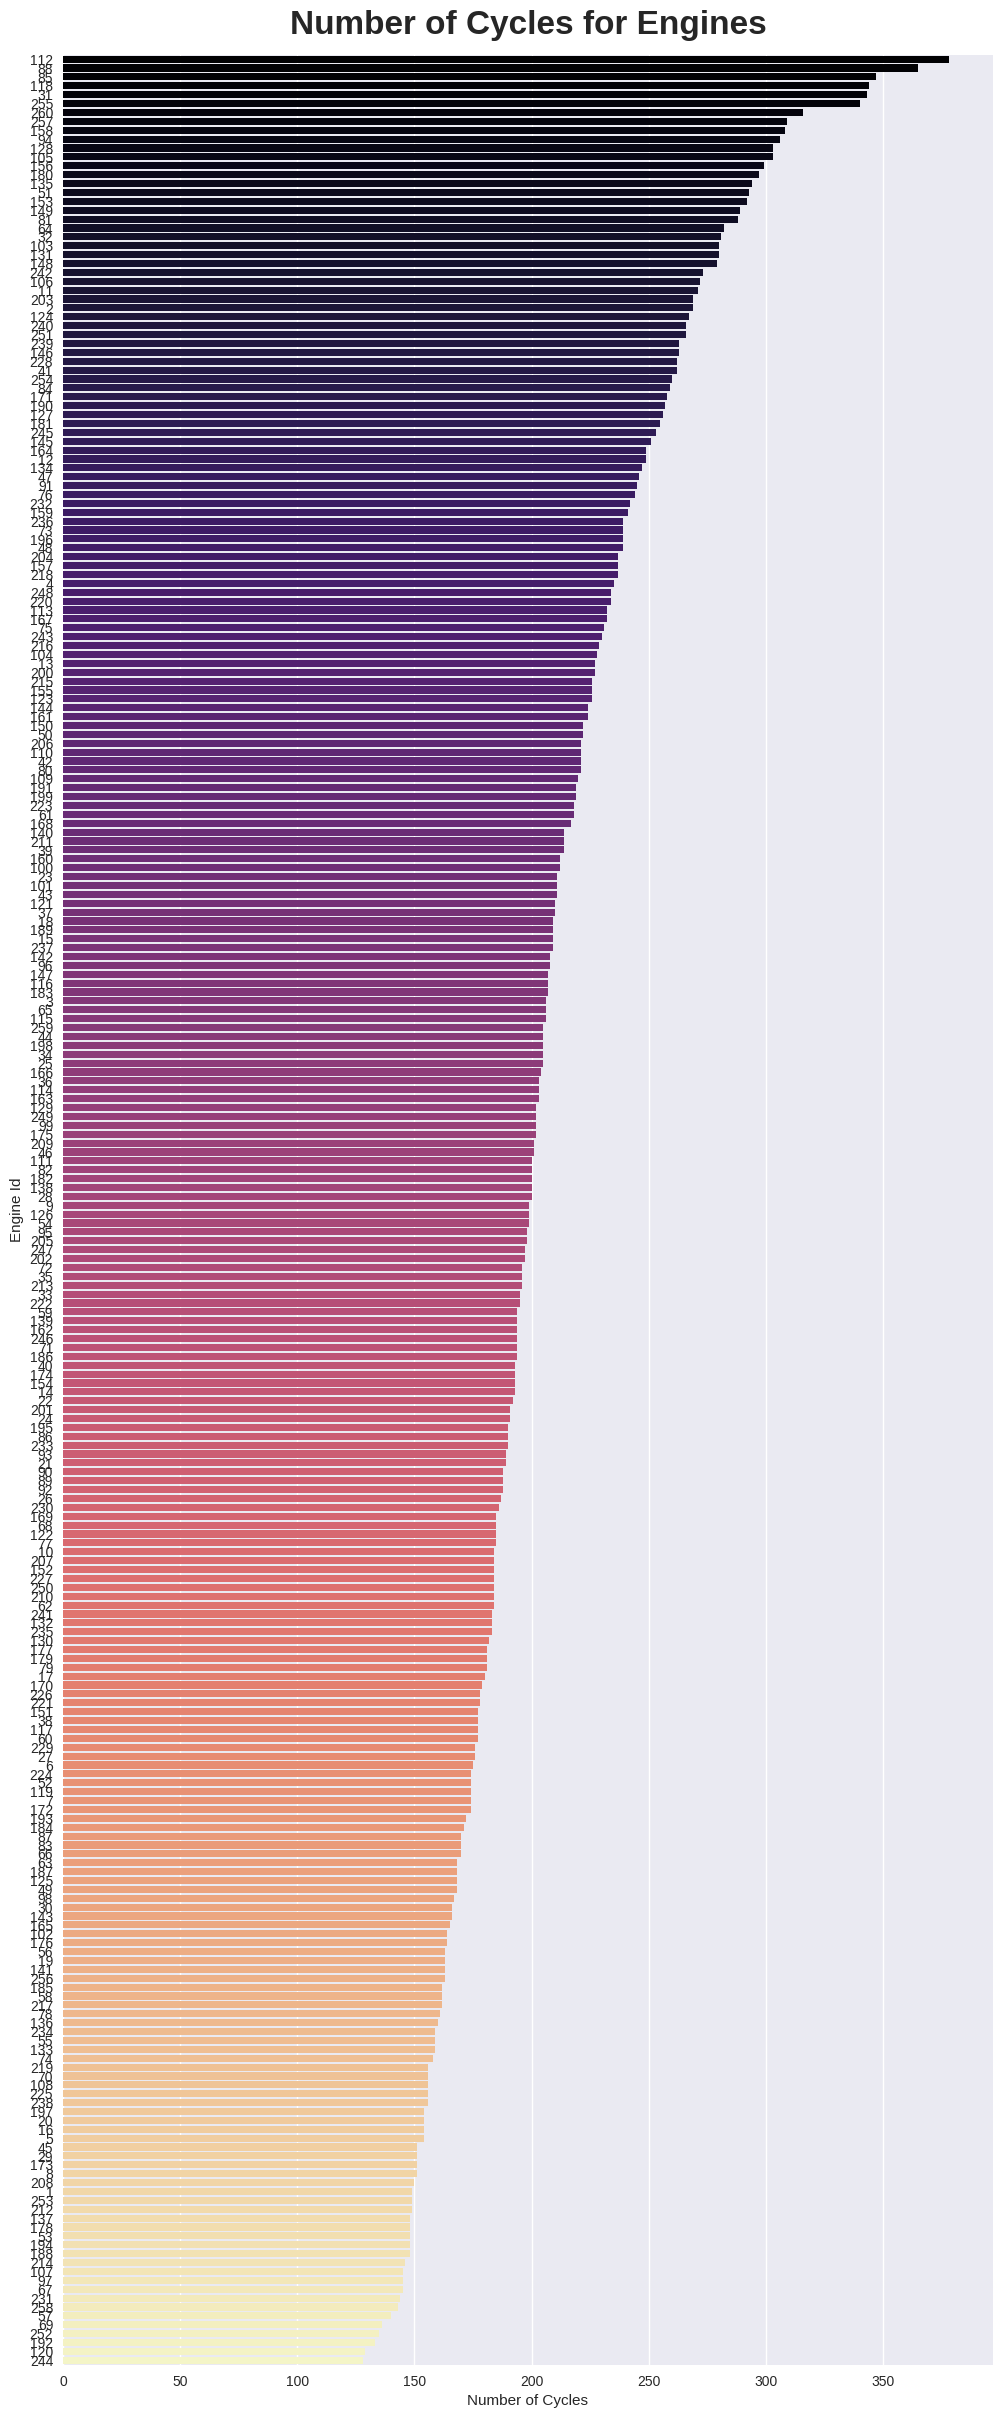

In [ ]:
cnt_train = train[["unit_ID", "cycles"]].groupby("unit_ID").max().sort_values(by="cycles", ascending=False)
cnt_ind = [str(i) for i in cnt_train.index.to_list()]
cnt_val = list(cnt_train.cycles.values)

plt.style.use("seaborn")
plt.figure(figsize=(12, 30))
sns.barplot(x=list(cnt_val), y=list(cnt_ind), palette='magma')
plt.xlabel('Number of Cycles')
plt.ylabel('Engine Id')
plt.title('Number of Cycles for Engines', fontweight='bold', fontsize=24, pad=15)

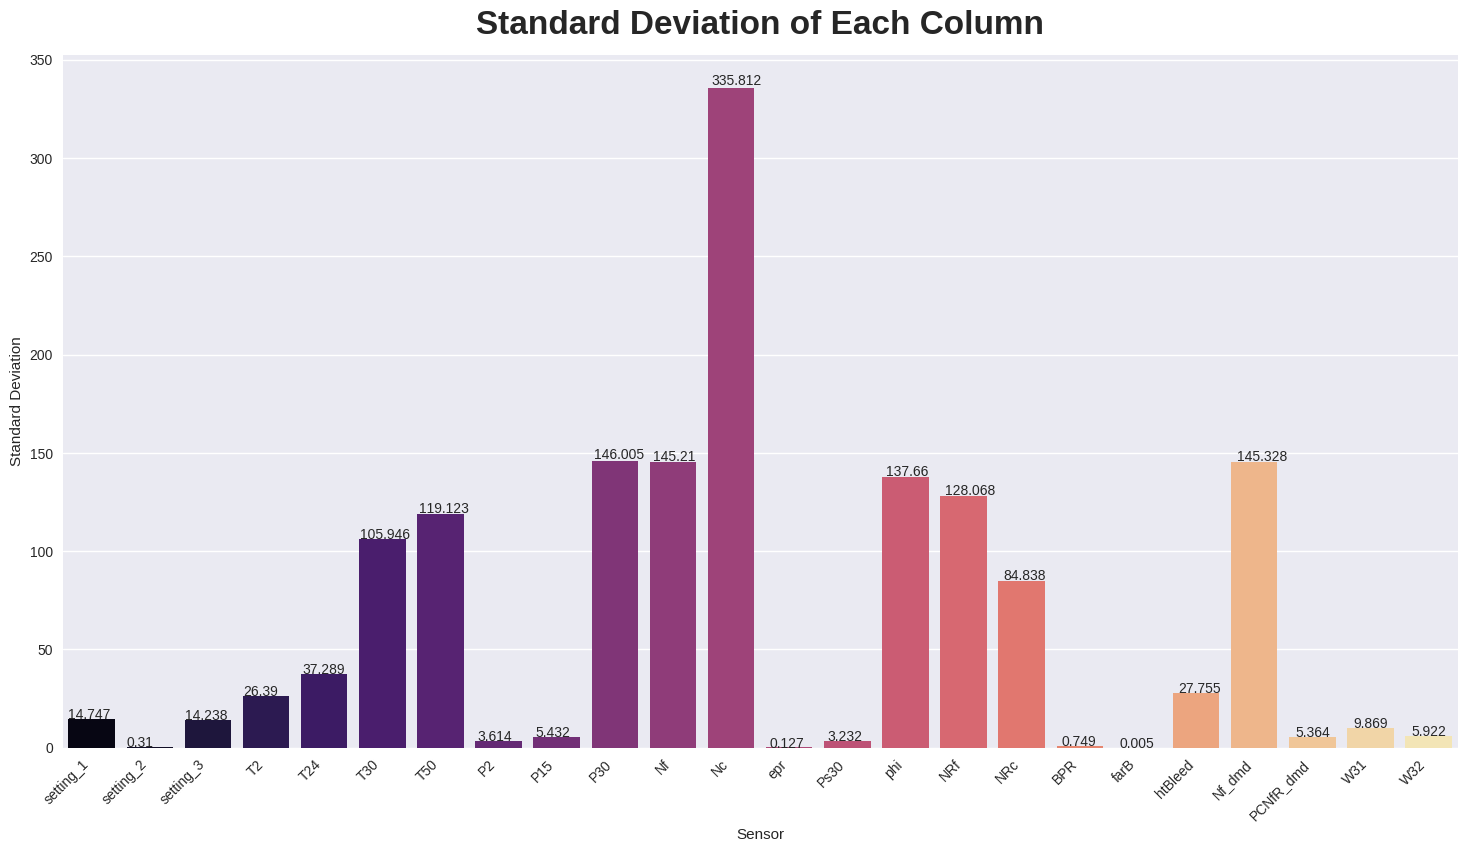

In [ ]:
plt.figure(figsize=(18, 9))
subset_stats = data_train.agg(['mean', 'std']).T[2:]
ax = sns.barplot(x=subset_stats.index, y="std", data=subset_stats, palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Sensor")
ax.set_ylabel("Standard Deviation")
ax.set_title("Standard Deviation of Each Column", fontweight='bold', fontsize=24, pad=15)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [ ]:
train.drop(columns=['htBleed','PCNfR_dmd','P2','T2','setting_3','farB','epr'],inplace=True)
#columns_to_be_dropped =['unit_ID','setting_1','setting_2','setting_3', 'T2', 'P2','P15', 'epr', 'farB', 'BPR', 'PCNfR_dmd']

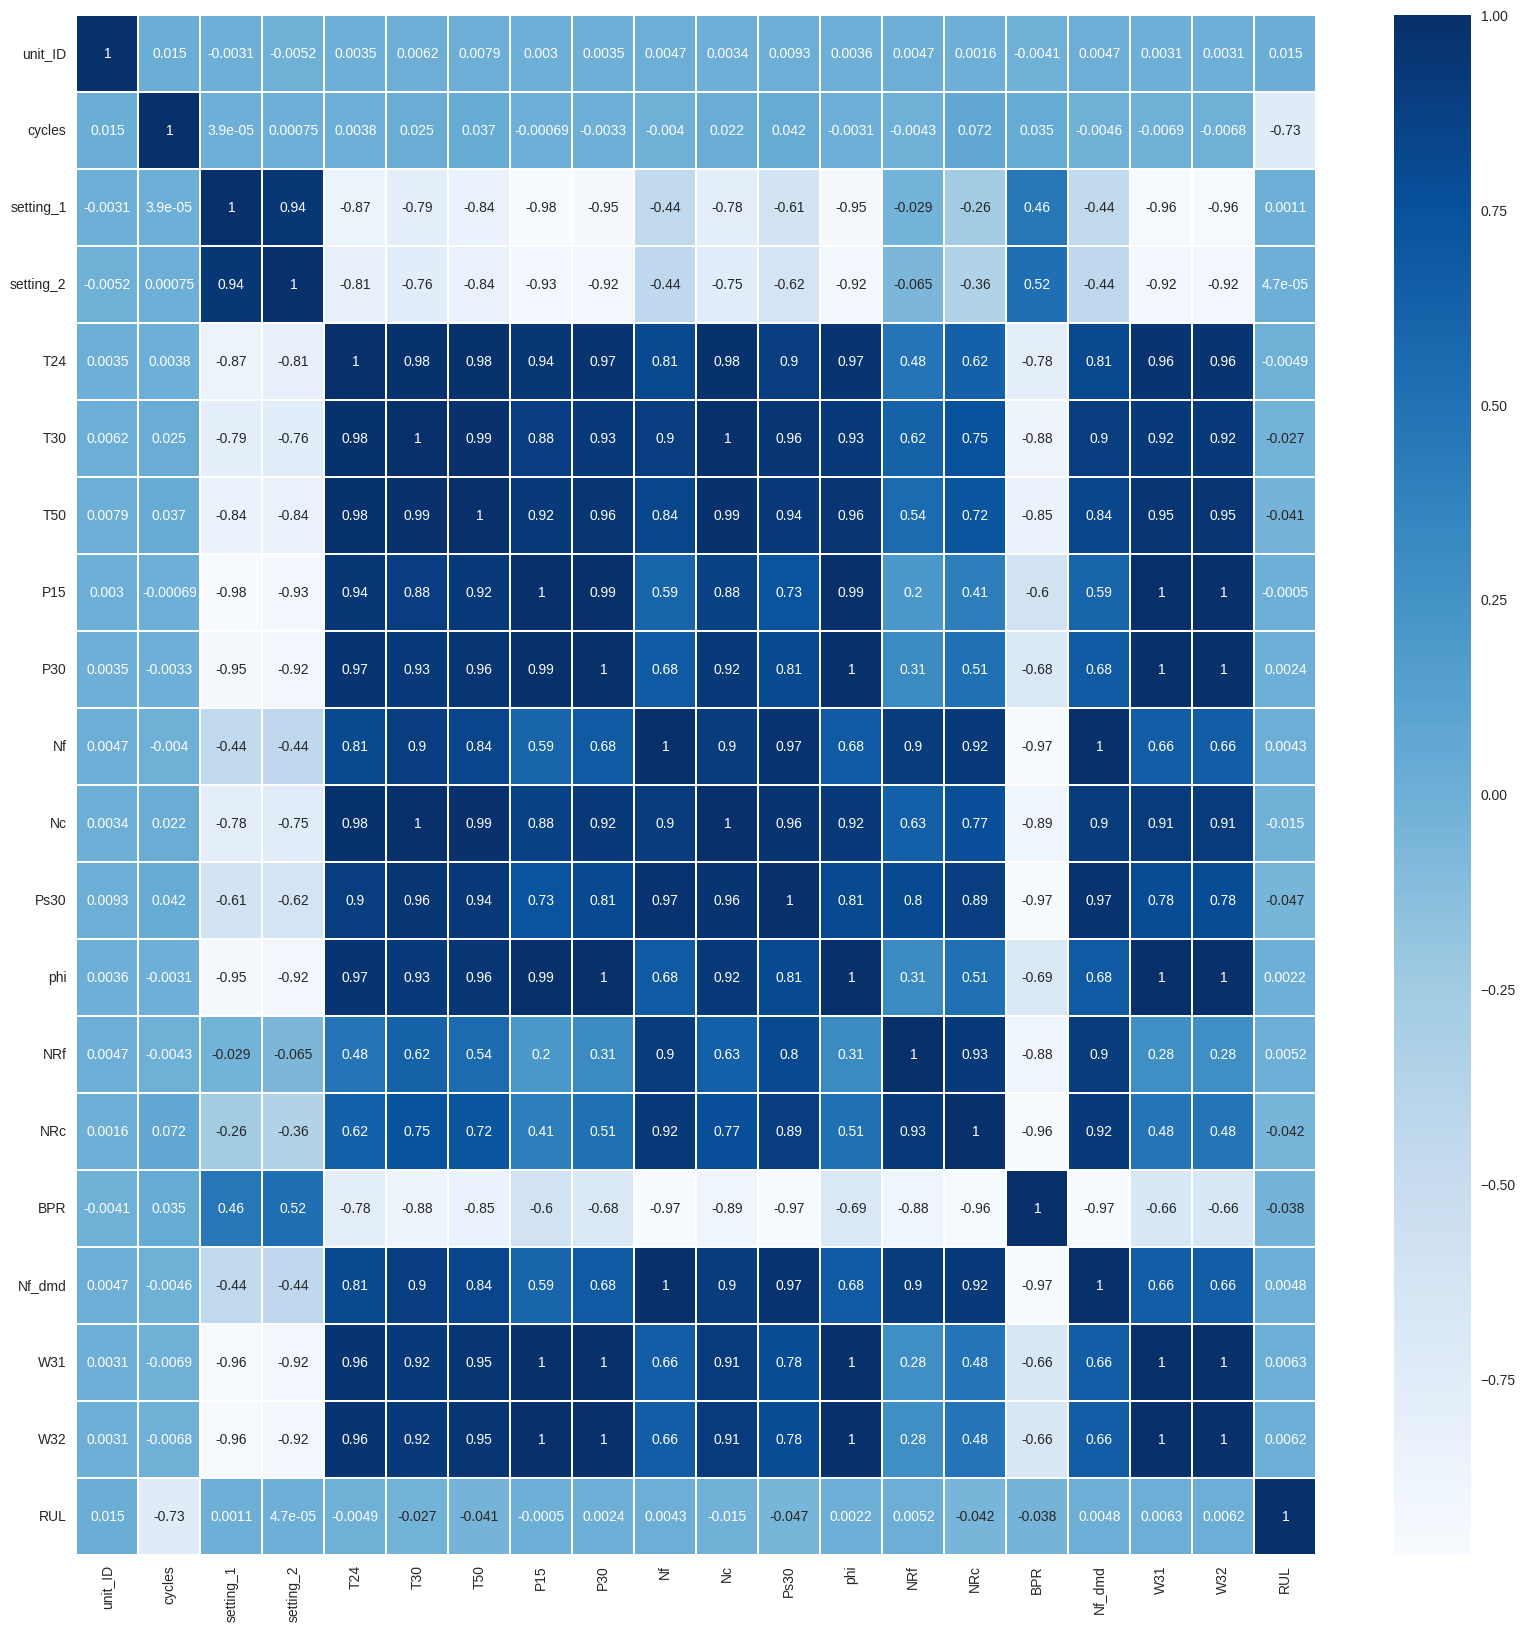

In [ ]:
sns.heatmap(train.corr(),annot=True,cmap='Blues',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [ ]:
def process_targets(data_length, early_rul = None):
    if early_rul == None:
        return np.arange(data_length-1, -1, -1)
    else:
        early_rul_duration = data_length - early_rul
        if early_rul_duration <= 0:
            return np.arange(data_length-1, -1, -1)
        else:
            return np.append(early_rul*np.ones(shape = (early_rul_duration,)), np.arange(early_rul-1, -1, -1))

In [ ]:
def process_input_data_with_targets(input_data, target_data = None, window_length = 1, shift = 1):
    num_batches = np.int(np.floor((len(input_data) - window_length)/shift)) + 1
    num_features = input_data.shape[1]
    output_data = np.repeat(np.nan, repeats = num_batches * window_length * num_features).reshape(num_batches, window_length,
                                                                                                  num_features)
    if target_data is None:
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
        return output_data
    else:
        output_targets = np.repeat(np.nan, repeats = num_batches)
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
            output_targets[batch] = target_data[(shift*batch + (window_length-1))]
        return output_data, output_targets

In [ ]:
def process_test_data(test_data_for_an_engine, window_length, shift, num_test_windows = 1):

    max_num_test_batches = np.int(np.floor((len(test_data_for_an_engine) - window_length)/shift)) + 1
    if max_num_test_batches < num_test_windows:
        required_len = (max_num_test_batches -1)* shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length= window_length, shift = shift)
        return batched_test_data_for_an_engine, max_num_test_batches
    else:
        required_len = (num_test_windows - 1) * shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length= window_length, shift = shift)
        return batched_test_data_for_an_engine, num_test_windows

In [ ]:
test_data = pd.read_csv("/content/CMaps/test_FD002.txt", sep = "\s+", header = None,names=columns_train )
true_rul = pd.read_csv("/content/CMaps/RUL_FD002.txt", sep = '\s+', header = None)

window_length = 20
shift = 1
early_rul = 125
processed_train_data = []
processed_train_targets = []
num_test_windows = 5
processed_test_data = []
num_test_windows_list = []

columns_to_be_dropped =['unit_ID','setting_1','setting_2','setting_3', 'T2', 'P2','P15', 'epr',
                 'farB', 'htBleed', 'PCNfR_dmd']

train_data_first_column = data_train ["unit_ID"]
test_data_first_column = test_data["unit_ID"]

In [ ]:
scaler = StandardScaler()
train_data = scaler.fit_transform(data_train.drop(columns = columns_to_be_dropped))
test_data = scaler.transform(test_data.drop(columns = columns_to_be_dropped))

train_data = pd.DataFrame(data = np.c_[train_data_first_column, train_data])
test_data = pd.DataFrame(data = np.c_[test_data_first_column, test_data])

num_train_machines = len(train_data[0].unique())
num_test_machines = len(test_data[0].unique())

In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,-1.563383,-0.653071,-0.579176,-0.572622,-0.602496,-0.042898,-0.545819,-0.298598,-0.603008,0.415116,-0.212615,0.021948,-0.039954,-0.613958,-0.619148
1,1.0,-1.548928,-0.798422,-0.630051,-0.668741,-0.986938,-0.119202,-0.658830,-0.242911,-0.985404,0.414648,0.067215,0.063719,-0.115645,-1.051681,-1.048190
2,1.0,-1.534473,-1.136055,-1.540521,-1.326301,-0.732150,-2.160819,-1.559759,-1.947558,-0.739869,-2.393490,-2.377822,2.087798,-2.159318,-0.679819,-0.641912
3,1.0,-1.520018,-0.808881,-0.622406,-0.663705,-0.987280,-0.119133,-0.658830,-0.317161,-0.983225,0.414257,0.024309,0.030890,-0.115645,-1.033443,-1.013808
4,1.0,-1.505563,-1.142491,-1.531554,-1.322271,-0.736670,-2.160888,-1.584148,-1.885683,-0.739215,-2.393724,-2.420728,2.090734,-2.159318,-0.674753,-0.666180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260.0,2.932140,0.780862,0.713849,0.537834,0.351999,0.661400,0.973974,0.536709,0.348551,0.425267,1.214589,-0.034903,0.655032,0.361801,0.345429
53755,260.0,2.946595,0.700946,0.890544,0.996270,0.752399,0.621801,1.163338,0.957457,0.763855,0.420582,2.107123,-0.762087,0.620627,0.740757,0.755203
53756,260.0,2.961051,-1.131496,-1.356652,-1.238408,-0.736259,-2.145255,-1.223526,-1.808340,-0.743356,-2.375530,-1.123891,2.316803,-2.159318,-0.668673,-0.662515
53757,260.0,2.975506,-1.121841,-1.387706,-1.168060,-0.738314,-2.145324,-1.228588,-1.752653,-0.738779,-2.375374,-1.109510,2.300789,-2.159318,-0.682859,-0.692473


In [ ]:
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,-1.563383,0.680028,0.728668,0.835679,0.766645,0.620355,0.710521,0.812051,0.767270,0.418708,0.559923,-0.910220,0.620627,0.773181,0.790616
1,1.0,-1.548928,0.754849,0.577930,0.341397,0.354464,0.654719,0.559870,0.394398,0.357777,0.418240,-0.159573,-0.118978,0.655032,0.354709,0.393558
2,1.0,-1.534473,-0.634835,-0.574740,-0.647083,-0.609961,-0.042761,-0.550911,-0.366661,-0.603153,0.415351,-0.159808,0.023416,-0.039954,-0.588627,-0.601349
3,1.0,-1.520018,-0.791181,-0.663370,-0.651028,-0.985362,-0.119133,-0.629378,-0.239818,-0.985550,0.415116,0.003564,0.088675,-0.115645,-1.057761,-1.022589
4,1.0,-1.505563,-1.151877,-1.574312,-1.299102,-0.731876,-2.160888,-1.572534,-1.925902,-0.737399,-2.393334,-2.368510,2.053234,-2.159318,-0.656514,-0.658513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259.0,0.142314,-0.646635,-0.509329,-0.637765,-0.600921,-0.038835,-0.470062,-0.317161,-0.603081,0.420348,0.256519,-0.010881,-0.039954,-0.592680,-0.602362
33987,259.0,0.156769,-0.811294,-0.649778,-0.684859,-0.988102,-0.114933,-0.551685,-0.304786,-0.983080,0.419723,0.493679,0.032758,-0.115645,-1.035469,-1.024379
33988,259.0,0.171224,-0.805126,-0.668562,-0.726413,-0.988581,-0.114244,-0.546444,-0.258380,-0.981482,0.419958,0.379224,0.071993,-0.115645,-1.035469,-1.012051
33989,259.0,0.185679,1.687026,1.601193,1.701763,1.852849,1.096154,1.644236,1.387486,1.860993,0.417303,1.122766,-1.203415,1.095420,1.853304,1.838279


In [ ]:
for i in np.arange(1, num_train_machines + 1):
    temp_train_data = train_data[train_data[0] == i].drop(columns = [0]).values

    # Determine whether it is possible to extract training data with the specified window length.
    print(len(temp_train_data))
    if (len(temp_train_data) < window_length):
        print("Train engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")

    temp_train_targets = process_targets(data_length = temp_train_data.shape[0], early_rul = early_rul)
    data_for_a_machine, targets_for_a_machine = process_input_data_with_targets(temp_train_data, temp_train_targets,
                                                                                window_length= window_length, shift = shift)

    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)

149
269
206
235
154
175
174
151
199
184
271
249
227
193
209
154
180
209
163
154
189
192
211
191
205
187
176
200
151
166
343
281
195
205
196
203
210
177
214
193
262
221
211
205
151
201
246
239
168
222
293
174
148
199
159
163
140
162
194
177
218
184
168
282
206
170
145
185
136
156
194
196
239
158
231
244
185
161
181
221
288
200
170
259
347
190
170
365
188
188
245
188
189
306
198
208
145
167
202
212
211
164
280
228
303
272
145
156
220
221
200
378
232
203
206
207
177
344
174
129
210
185
226
267
168
199
256
303
202
182
280
183
159
247
294
160
148
200
194
214
163
208
166
224
251
263
207
279
289
222
177
184
292
193
226
299
237
308
241
212
224
194
203
249
165
204
232
217
185
179
258
174
151
193
202
164
181
148
181
297
255
200
207
171
162
194
168
148
209
257
219
133
172
148
190
239
154
205
219
227
191
197
269
237
198
221
184
150
201
184
214
149
196
146
226
229
162
237
156
234
178
195
218
174
156
178
184
262
176
186
144
242
190
159
183
239
209
156
263
266
183
273
230
128
253
194
197
234
202
184


In [ ]:
for i in np.arange(1, num_test_machines + 1):
    temp_test_data = test_data[test_data[0] == i].drop(columns = [0]).values

    # Determine whether it is possible to extract test data with the specified window length.
    print(len(temp_test_data))
    if (len(temp_test_data) <= window_length):
        print("Test engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")

    # Prepare test data
    test_data_for_an_engine, num_windows = process_test_data(temp_test_data, window_length=window_length, shift = shift,
                                                             num_test_windows = num_test_windows)

    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_test_data = np.concatenate(processed_test_data)
true_rul = true_rul[0].values

# Shuffle training data
index = np.random.permutation(len(processed_train_targets))
processed_train_data, processed_train_targets = processed_train_data[index], processed_train_targets[index]

258
55
165
86
148
63
184
173
161
84
162
74
164
160
165
88
264
40
172
101
128
159
49
210
147
76
68
23
101
184
123
170
135
52
77
163
49
127
149
183
210
137
184
164
195
132
81
132
65
164
37
165
149
74
123
73
76
247
22
144
70
205
174
233
367
63
146
218
158
264
65
143
151
103
192
222
67
128
113
278
76
96
21
204
183
83
131
166
59
163
278
123
76
117
78
140
213
113
163
149
38
122
186
141
61
72
132
174
144
219
131
109
45
153
210
171
55
97
202
160
59
29
61
149
79
99
126
110
218
141
73
122
186
186
120
77
226
200
116
306
69
163
226
143
142
144
78
157
70
196
141
90
146
58
72
75
161
171
187
124
174
185
144
199
35
97
78
107
80
85
243
128
117
51
83
200
191
54
156
154
199
134
150
64
254
166
84
86
178
158
95
161
245
50
262
109
59
120
117
60
25
124
115
41
31
162
141
166
131
182
155
187
159
75
71
100
49
33
161
54
55
180
29
43
166
165
180
44
109
125
187
159
40
147
102
274
235
94
106
50
44
194
40
49
265
80
87
162
36
234
64
249
139
131
150
59
199
98
123


In [ ]:
print("Processed trianing data shape: ", processed_train_data.shape)
print("Processed training ruls shape: ", processed_train_targets.shape)
print("Processed test data shape: ", processed_test_data.shape)
print("True RUL shape: ", true_rul.shape)

Processed trianing data shape:  (48819, 20, 15)
Processed training ruls shape:  (48819,)
Processed test data shape:  (1289, 20, 15)
True RUL shape:  (259,)


In [ ]:
processed_train_data, processed_val_data, processed_train_targets, processed_val_targets = train_test_split(processed_train_data,
                                                                                                            processed_train_targets,
                                                                                                            test_size = 0.2,
                                                                                                            random_state = 83)
print("Processed train data shape: ", processed_train_data.shape)
print("Processed validation data shape: ", processed_val_data.shape)
print("Processed train targets shape: ", processed_train_targets.shape)
print("Processed validation targets shape: ", processed_val_targets.shape)

Processed train data shape:  (39055, 20, 15)
Processed validation data shape:  (9764, 20, 15)
Processed train targets shape:  (39055,)
Processed validation targets shape:  (9764,)


In [ ]:
def create_compiled_model():
    model = Sequential([
        layers.LSTM(128, input_shape = (window_length, 15), return_sequences=True, activation = "tanh"), # 15 is the number of columns
        layers.LSTM(64, activation = "tanh", return_sequences = True),
        layers.LSTM(32, activation = "tanh"),
        layers.Dense(96, activation = "relu"),
        layers.Dense(128, activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
    return model

In [ ]:
def scheduler(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.0001
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)
model = create_compiled_model()
history = model.fit(processed_train_data, processed_train_targets, epochs = 20,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = callback,
                    batch_size = 128, verbose = 2)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
306/306 - 48s - loss: 2490.8079 - val_loss: 1738.8480 - lr: 0.0010 - 48s/epoch - 156ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
306/306 - 43s - loss: 1304.9146 - val_loss: 756.6553 - lr: 0.0010 - 43s/epoch - 142ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
306/306 - 40s - loss: 531.4243 - val_loss: 362.7421 - lr: 0.0010 - 40s/epoch - 131ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
306/306 - 41s - loss: 349.7772 - val_loss: 341.3081 - lr: 0.0010 - 41s/epoch - 133ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/20
306/306 - 41s - loss: 313.6430 - val_loss: 318.2570 - lr: 0.0010 - 41s/epoch - 133ms/step

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/20
306/306 - 38s - loss: 291.8319 - val_loss: 348.7729 - lr: 0.0010 - 38s/epoch - 126ms/step

Epoch 

In [ ]:
def scheduler(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 15:
        return 0.0001
    else:
        return 0.00001
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)
model = create_compiled_model()
history = model.fit(processed_train_data, processed_train_targets, epochs = 20,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = callback,
                    batch_size = 128, verbose = 2)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
306/306 - 52s - loss: 2448.9761 - val_loss: 1737.9945 - lr: 0.0010 - 52s/epoch - 170ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
306/306 - 39s - loss: 1165.6003 - val_loss: 507.4330 - lr: 0.0010 - 39s/epoch - 128ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
306/306 - 44s - loss: 389.2013 - val_loss: 364.2375 - lr: 0.0010 - 44s/epoch - 145ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
306/306 - 41s - loss: 325.2881 - val_loss: 303.5973 - lr: 0.0010 - 41s/epoch - 134ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/20
306/306 - 40s - loss: 308.0392 - val_loss: 286.8941 - lr: 0.0010 - 40s/epoch - 130ms/step

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/20
306/306 - 43s - loss: 284.2155 - val_loss: 275.6065 - lr: 0.0010 - 43s/epoch - 139ms/step

Epoch 

In [ ]:
rul_pred = model.predict(processed_test_data).reshape(-1)
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows))
                             for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]
RMSE = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))
print("RMSE: ", RMSE)

41/41 [==============================] - 2s 17ms/step
RMSE:  27.403043863008392


In [ ]:
tf.keras.models.save_model(model, "FD001_LSTM_piecewise_RMSE_"+ str(np.round(RMSE, 4)) + ".h5")

indices_of_last_examples = np.cumsum(num_test_windows_list) - 1
preds_for_last_example = np.concatenate(preds_for_each_engine)[indices_of_last_examples]

RMSE_new = np.sqrt(mean_squared_error(true_rul, preds_for_last_example))
print("RMSE (Taking only last examples): ", RMSE_new)

RMSE (Taking only last examples):  27.603215390254434


In [ ]:
def compute_s_score(rul_true, rul_pred):
    diff = rul_pred - rul_true
    return np.sum(np.where(diff < 0, np.exp(-diff/13)-1, np.exp(diff/10)-1))
s_score = compute_s_score(true_rul, preds_for_last_example)
print("S-score: ", s_score)

S-score:  8993.93802247732


In [ ]:
r2 = r2_score(true_rul, preds_for_last_example)
print("R2-Score: ", r2)

R2-Score:  0.7365505914604877


In [ ]:
true_rul

array([ 18,  79, 106, 110,  15, 155,   6,  90,  11,  79,   6,  73,  30,
        11,  37,  67,  68,  99,  22,  54,  97,  10, 142,  77,  88, 163,
       126, 138,  83,  78,  75,  11,  53, 173,  63, 100, 151,  55,  48,
        37,  44,  27,  18,   6,  15, 112, 131,  13, 122,  13,  98,  53,
        52, 106, 103, 152, 123,  26, 178,  73, 169,  39,  39,  14,  11,
       121,  86,  56, 115,  17, 148, 104,  78,  86,  98,  36,  94,  52,
        91,  15, 141,  74, 146,  17,  47, 194,  21,  79,  97,   8,   9,
        73, 183,  97,  73,  49,  31,  97,   9,  14, 106,   8,   8, 106,
       116, 120,  61, 168,  35,  80,   9,  50, 151,  78,  91,   7, 181,
       150, 106,  15,  67, 145, 180,   7, 179, 124,  82, 108,  79, 121,
       120,  39,  38,   9, 167,  87,  88,   7,  51,  55, 155,  47,  81,
        43,  98,  10,  92,  11, 165,  34, 115,  59,  99, 103, 108,  83,
       171,  15,   9,  42,  13,  41,  88,  14, 155, 188,  96,  82, 135,
       182,  36, 107,  14,  95, 142,  23,   6, 144,  35,  97,  6

In [ ]:
np.rint(preds_for_last_example)

array([ 13., 116.,  95., 116.,  12., 122.,   6.,  63.,  11., 111.,  11.,
       114.,  50.,   5.,  91.,  93.,  69., 117.,  21.,  57.,  95.,  10.,
       121., 116.,  82.,  98., 112., 124., 102.,  61., 115.,  20.,  49.,
       121., 115.,  85., 122.,  60.,  38.,  27.,  37.,  28.,  31.,  11.,
        12., 122., 102.,  16., 117.,  11., 122.,  29.,  46.,  97.,  84.,
       123., 122.,  24., 126.,  70., 123.,  32.,  47.,  17.,  13., 116.,
       105.,  45., 123.,  21., 124.,  77.,  77., 109., 123.,  38., 115.,
        43.,  99.,  10., 103.,  66., 124.,  15.,  52., 101.,  26.,  72.,
       120.,   6.,  11., 104., 120.,  65.,  90.,  31.,  24.,  56.,  15.,
        15., 123.,   2.,   3.,  53., 117., 117.,  44., 124.,  40.,  93.,
        20.,  85., 122.,  63.,  57.,   4., 116.,  89., 111.,  23., 120.,
       125., 117.,   9., 100., 100.,  48., 113.,  98., 110., 115.,  47.,
        47.,   9., 125.,  48.,  90.,   3.,  47.,  52., 113.,  22.,  81.,
        34., 114.,  14., 113.,  14., 107.,  32.,  9

In [ ]:
preds_for_last_example

array([ 13.185753 , 115.71219  ,  95.0372   , 115.959694 ,  12.492329 ,
       122.24448  ,   6.4304376,  62.62679  ,  11.398054 , 110.978226 ,
        10.750614 , 114.32568  ,  50.30242  ,   4.780314 ,  90.66705  ,
        92.784546 ,  69.48508  , 116.82236  ,  21.019566 ,  57.257088 ,
        95.14125  ,   9.536359 , 121.34067  , 116.05039  ,  81.833916 ,
        98.15088  , 111.77072  , 123.555    , 102.014496 ,  60.655064 ,
       115.02443  ,  19.528849 ,  49.364223 , 121.05577  , 115.19916  ,
        85.17131  , 121.50733  ,  59.650867 ,  38.303284 ,  26.95139  ,
        36.901913 ,  28.072598 ,  30.89003  ,  11.404627 ,  11.884307 ,
       121.67952  , 101.72932  ,  15.972873 , 116.72649  ,  10.96555  ,
       122.17397  ,  28.684843 ,  46.03153  ,  96.59532  ,  83.75396  ,
       122.84942  , 122.23242  ,  24.499863 , 125.87391  ,  70.39475  ,
       123.06915  ,  32.254906 ,  46.773746 ,  17.013065 ,  12.734036 ,
       115.61091  , 104.61697  ,  45.44939  , 122.88462  ,  20.5

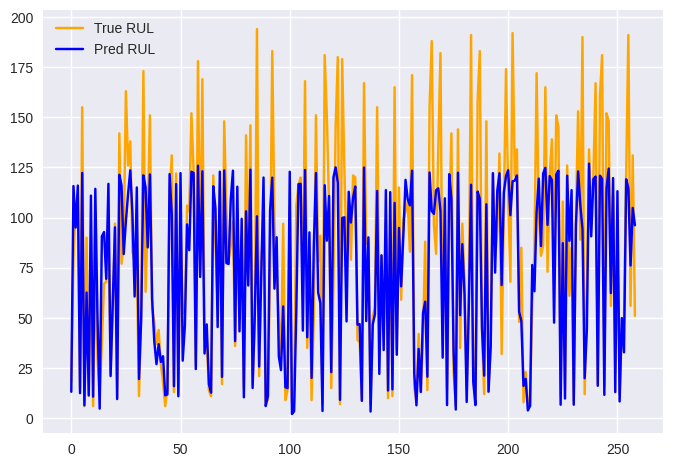

In [ ]:
plt.plot(true_rul, label = "True RUL", color = "orange")
plt.plot(preds_for_last_example, label = "Pred RUL", color = "blue")
plt.legend()
plt.show()